In [2]:
# Import dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
iris_df = pd.read_csv("Iris.csv", index_col=0)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


[Text(0.5, 1.0, 'Petal Length vs. Petal Width')]

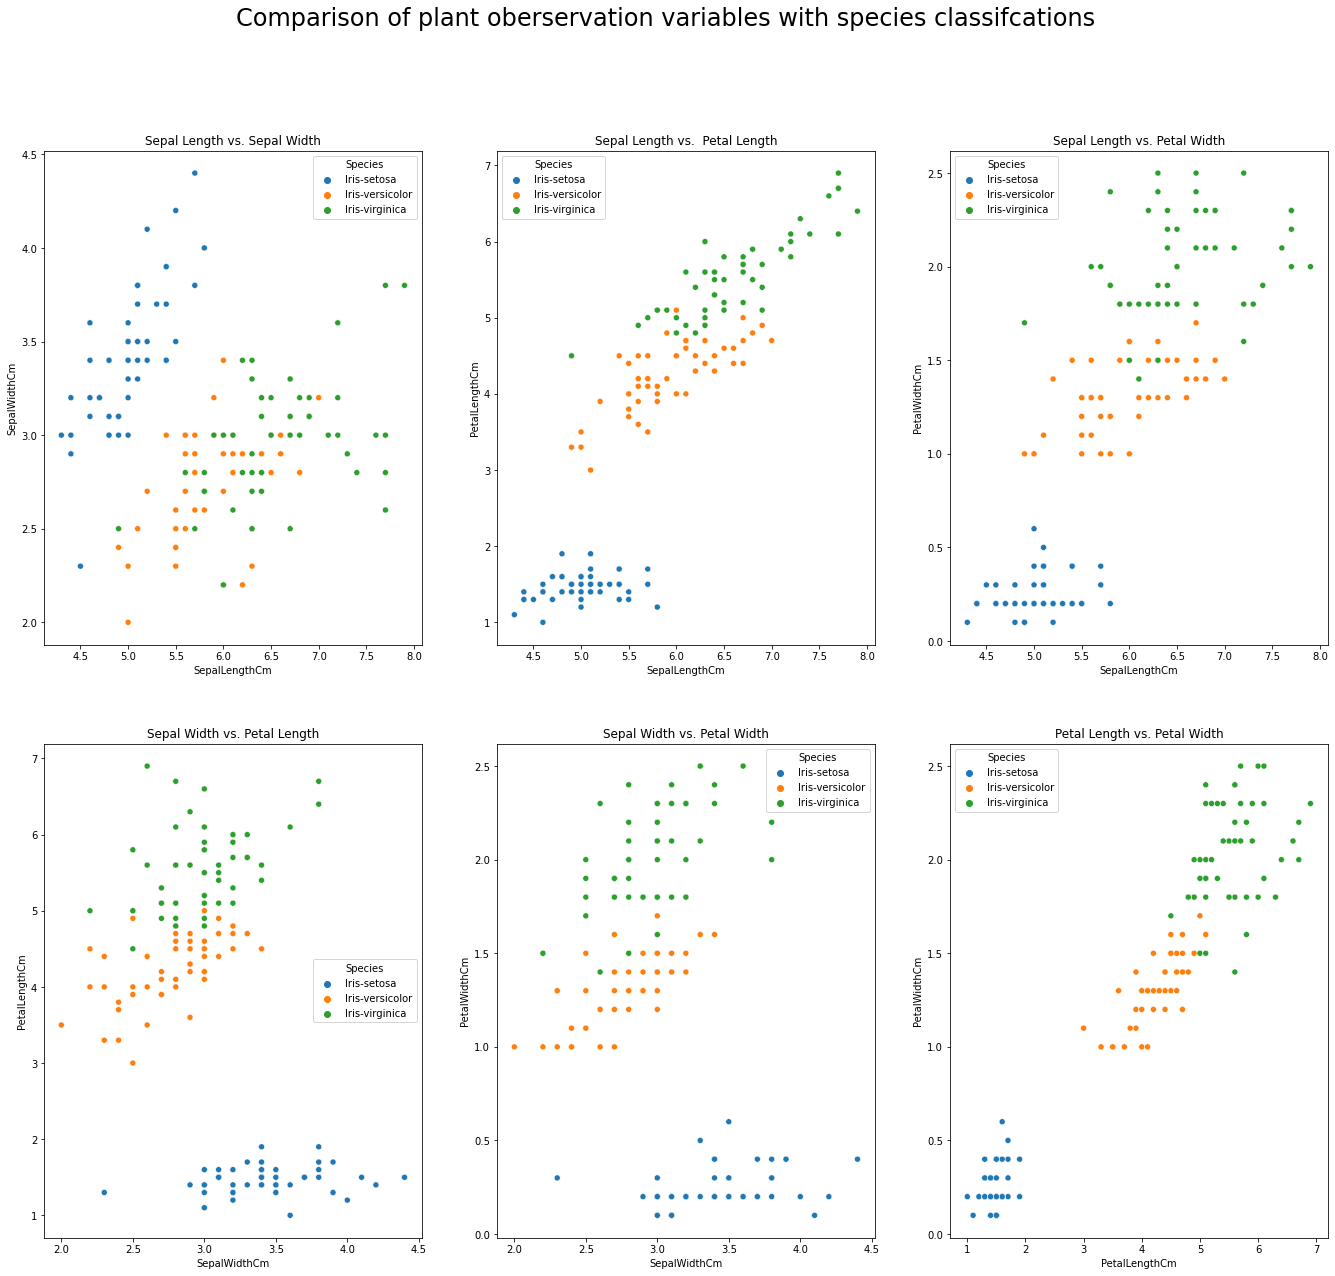

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(23, 20))
fig.suptitle("Comparison of plant oberservation variables with species classifcations", size=24)
sns.scatterplot(ax=axes[0,0], x="SepalLengthCm", y="SepalWidthCm", data=iris_df, hue="Species").set(title="Sepal Length vs. Sepal Width")
sns.scatterplot(ax=axes[0,1], x="SepalLengthCm", y="PetalLengthCm", data=iris_df, hue="Species").set(title="Sepal Length vs.  Petal Length")
sns.scatterplot(ax=axes[0,2], x="SepalLengthCm", y="PetalWidthCm", data=iris_df, hue="Species").set(title="Sepal Length vs. Petal Width")
sns.scatterplot(ax=axes[1,0], x="SepalWidthCm", y="PetalLengthCm", data=iris_df, hue="Species").set(title="Sepal Width vs. Petal Length")
sns.scatterplot(ax=axes[1,1], x="SepalWidthCm", y="PetalWidthCm", data=iris_df, hue="Species").set(title="Sepal Width vs. Petal Width")
sns.scatterplot(ax=axes[1,2], x="PetalLengthCm", y="PetalWidthCm", data=iris_df, hue="Species").set(title="Petal Length vs. Petal Width")

#### Most promising plots where the identified Species could be seperated into clusters?

I think the following 3 plots look the most promising to identify different Species of the Iris plant family:
* Sepal Length vs Petal Length (Plot 2)
* Sepal Width vs Petal Length (Plot 4)
* Petal Length vs Petal Width (Plot 6)

As the data on these scatter plots are cluster more closely together whilst also not overlapping and thus easier to cluster.

#### Two of the most promising plots to implement K-Nearest Neighbours model where k=3

1. Sepal Length vs Petal Length (Plot 2)
2. Sepal Width vs Petal Length (Plot 4)

### Preprocessing

In [5]:
# checking dataset for null values
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# checking datatypes of columns
iris_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## 1. SepalLength vs PetalLength (Plot 2)

### Prepare the data for training

In [8]:
X1 = iris_df[['SepalLengthCm', 'PetalLengthCm']].values.reshape(-1,2)

print('Data size:')
print(X1.shape)

Data size:
(150, 2)


### Building KNN model

C:\Users\Georgia\anaconda32nd\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Georgia\anaconda32nd\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


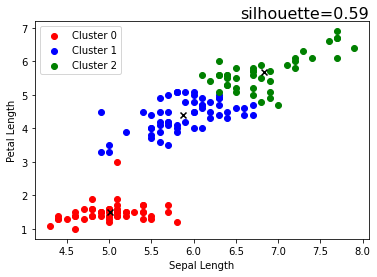

[Text(0.5, 1.0, 'Sepal Length vs.  Petal Length')]

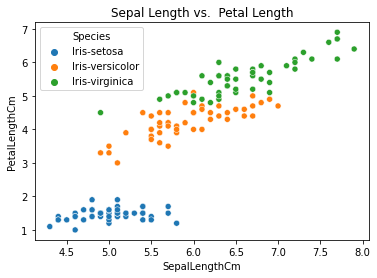

In [9]:
# set a value for k
k = 3
r = 0

kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
y_pred = kmeans.fit_predict(X1)
colours = 'rbgcmy'
                
for c in range(k):
      plt.scatter(X1[y_pred == c, 0], X1[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
score = round(silhouette_score(X1, kmeans.labels_, metric='euclidean'),2)
plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

sns.scatterplot(x="SepalLengthCm", y="PetalLengthCm", data=iris_df, hue="Species").set(title="Sepal Length vs.  Petal Length")

## 2. SepalWidth vs PetalLength (Plot 4)

Data size:
(150, 2)


C:\Users\Georgia\anaconda32nd\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Georgia\anaconda32nd\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


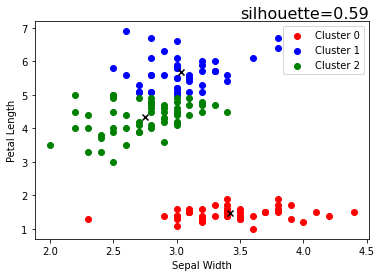

[Text(0.5, 1.0, 'Sepal Width vs. Petal Length')]

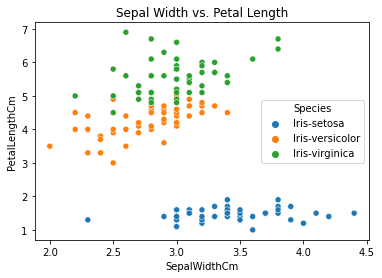

In [10]:
X4 = iris_df[['SepalWidthCm', 'PetalLengthCm']].values.reshape(-1,2)

print('Data size:')
print(X4.shape)

kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
y_pred = kmeans.fit_predict(X4)
colours = 'rbgcmy'
                
for c in range(k):
      plt.scatter(X4[y_pred == c, 0], X4[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
score = round(silhouette_score(X4, kmeans.labels_, metric='euclidean'),2)
plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

sns.scatterplot(x="SepalWidthCm", y="PetalLengthCm", data=iris_df, hue="Species").set(title="Sepal Width vs. Petal Length")